# Overlap reproduction
This notebook should reproduce some results of the Amit's book (Attractor Neural Networks) in the section 4.1

In [1]:
from __future__ import print_function
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hopfield import Hopfield

%matplotlib inline
sns.set(font_scale=2.0)

## Symmetric mix of attractors
According to Amit with the Hebbian rule of this model a very particular type of **spurios states** appears: symmetric mixtures. 

Symmetric mixtures are called like that because the overlaps with the intended attractors become more or less same. In the asynchronous case **only symmetric mixtures of odd number of states are stable**. We show a symmetric mixture here

First we build the network with very low temperature (noise)

In [12]:
n_dim = 400
n_store = 7
T = 0.0
prng = np.random.RandomState(seed=10000)
N = 2000

nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
list_of_patterns = nn.generate_random_patterns(n_store)
nn.train(list_of_patterns)

Then we run the network

In [13]:
overlaps = np.zeros((N, n_store))
for i in range(N):
    nn.update_async()
    overlaps[i, :] = nn.calculate_overlap()

#### Ploting

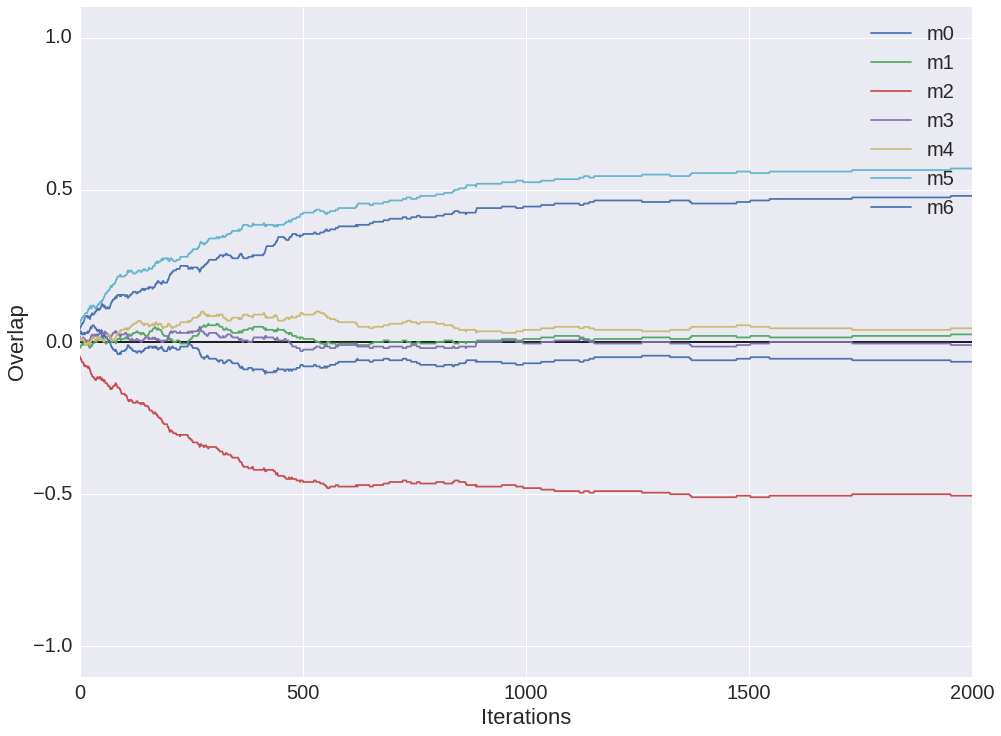

In [14]:
# Plot this thing
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.set_xlabel('Iterations')
ax.set_ylabel('Overlap')
ax.axhline(y=0, color='k')

for pattern_n, overlap in enumerate(overlaps.T):
    ax.plot(overlap, '-', label='m' +str(pattern_n))

ax.legend()
ax.set_ylim(-1.1, 1.1)

plt.show()

Here we see a symmetric mixture of three states

## Effect of temperature in symmetric mixtures
As Amit discusses we can increase the temperature to a **sweet spot** where the spurious states are destroyed and only the real attractors are preserved. We can try to repeat the same process with higher temperature

In [42]:
n_dim = 400
n_store = 7
T = 0.8
prng = np.random.RandomState(seed=10000)
N = 2000

nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
list_of_patterns = nn.generate_random_patterns(n_store)
nn.train(list_of_patterns)

Then we run the network

In [43]:
overlaps = np.zeros((N, n_store))
for i in range(N):
    nn.update_async()
    overlaps[i, :] = nn.calculate_overlap()

#### Ploting

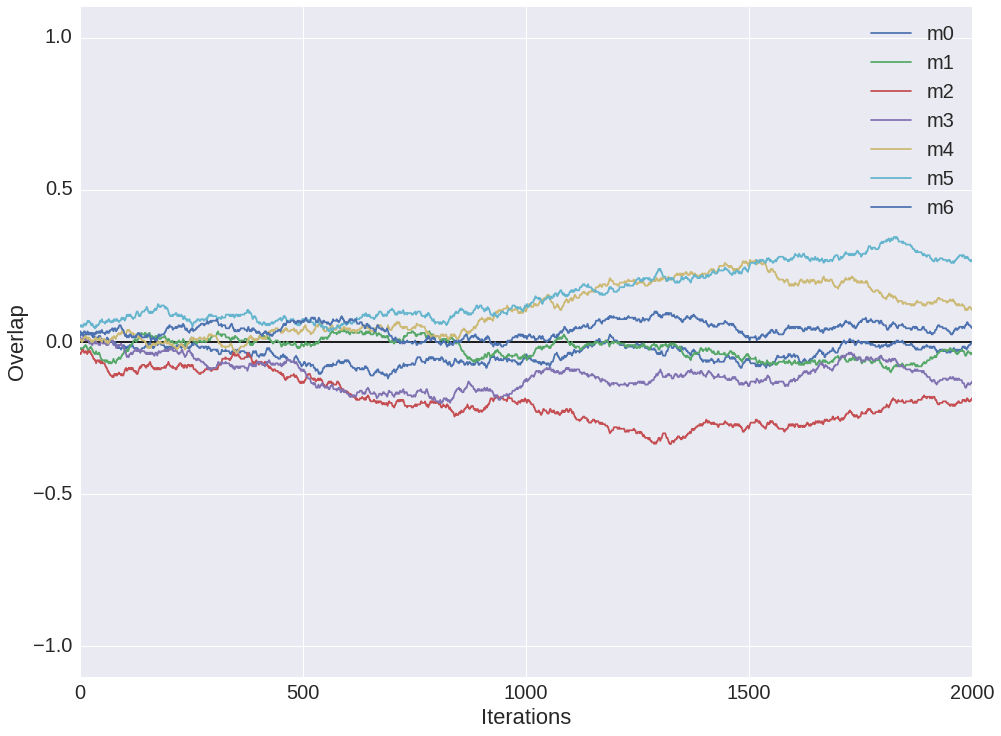

In [44]:
# Plot this thing
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.set_xlabel('Iterations')
ax.set_ylabel('Overlap')
ax.axhline(y=0, color='k')

for pattern_n, overlap in enumerate(overlaps.T):
    ax.plot(overlap, '-', label='m' +str(pattern_n))

ax.legend()
ax.set_ylim(-1.1, 1.1)

plt.show()

We can appreciate here that with higher noises all the other overlaps become close to 0 and one state the symmetric reflexion of state m0 is being recalled

## Effect of very high noise
Finally if the noise is very high only the state where all the overlaps vanish will be stable. 

In [9]:
n_dim = 400
n_store = 7
T = 3.0

nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
list_of_patterns = nn.generate_random_patterns(n_store)
nn.train(list_of_patterns)

Then we run the network

In [10]:
overlaps = np.zeros((N, n_store))
for i in range(N):
    nn.update_async()
    overlaps[i, :] = nn.calculate_overlap()

#### Ploting

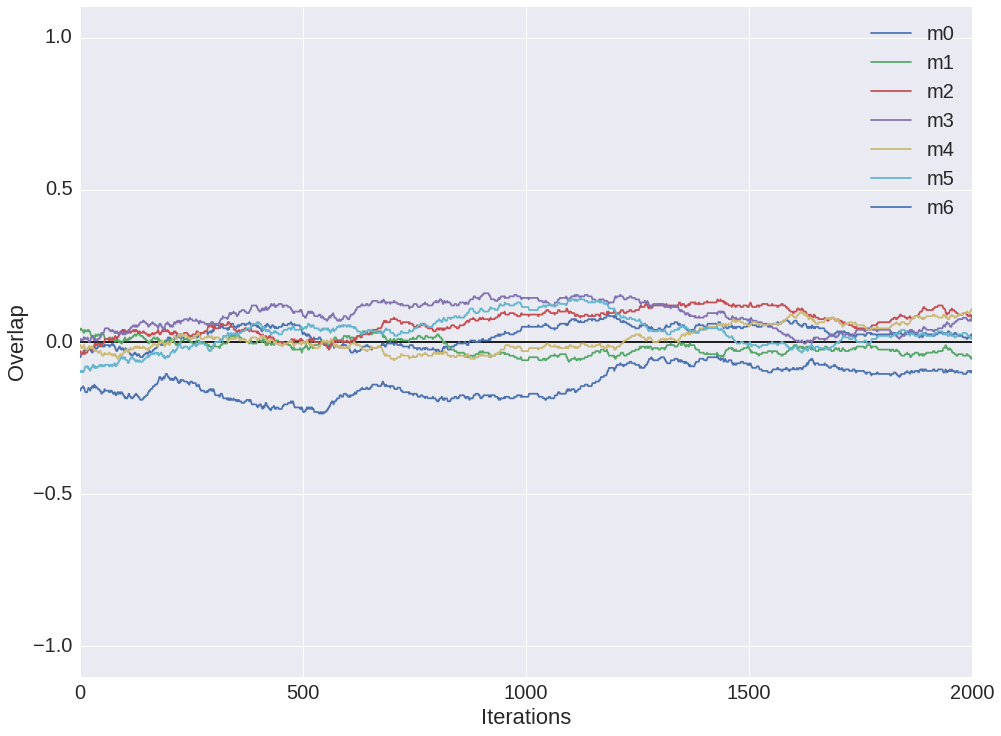

In [11]:
# Plot this thing
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.set_xlabel('Iterations')
ax.set_ylabel('Overlap')
ax.axhline(y=0, color='k')

for pattern_n, overlap in enumerate(overlaps.T):
    ax.plot(overlap, '-', label='m' +str(pattern_n))

ax.legend()
ax.set_ylim(-1.1, 1.1)

plt.show()

In this particular case we did not get the prediction of Amit. 